In [24]:
import json
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [41]:
#path = '/misc/vlgscratch4/LecunGroup/nvidia-collab/vlad/results/refactored_test/dreaming_uptrain_2/seed=1/logs.json'
# path = '/misc/vlgscratch4/LecunGroup/nvidia-collab/vlad/results/policy/dreaming_3/seed=1/logs.json'
# path = '/home/us441/nvidia-collab/vlad/results/policy/fm_km_dreaming_start_from_zero/seed=10/logs.json'
path = '/misc/vlgscratch4/LecunGroup/nvidia-collab/vlad/results/policy/dreaming_3_iter/seed=2/logs.json'

def draw_experiment(path, key='z_cost'):
    with open(path, 'r') as f:
        d = json.load(f)

    df_cut = pd.DataFrame(d['custom'][key], columns=['val', 't'])

    def draw(line_x, line_y, t):
        if len(line_x) == 0:
            return
        color_mapping = {'normal': 'g', 'adv': 'r'}
        c = color_mapping[t]
        plt.plot(line_x, line_y, c=c)

    def plot(df, k):
        current_line_y = []
        current_line_x = []
        current_type = None
        for i, row in df.iterrows():
            if row['t'] != current_type:
                if current_type is not None:
                    draw(current_line_x, current_line_y, current_type)
                    current_line_y = [current_line_y[-1]]
                    current_line_x = [current_line_x[-1]]

            current_type = row['t']
            current_line_y.append(row[k])
            current_line_x.append(i)
        draw(current_line_x, current_line_y, current_type)

    plt.figure(dpi = 150)
    plot(df_cut[500:700], 'val')

    df_cut['val'].min()
    plt.figure(dpi=200)
    
    plt.plot(df_cut[df_cut['t'] == 'adv']['val'], c='r', alpha=0.2)
    plt.plot(df_cut[df_cut['t'] == 'adv'].rolling(40).mean()['val'], c='r', alpha=1)
    plt.plot(df_cut[df_cut['t'] == 'normal']['val'], c='g', alpha=0.2)
    plt.plot(df_cut[df_cut['t'] == 'normal'].rolling(40).mean()['val'], c='g', alpha=1)
    plt.ylim(0, 1.5)

In [42]:
with open(path, 'r') as f:
    d = json.load(f)

df_cut = pd.DataFrame(d['custom'][key], columns=['val', 't'])

NameError: name 'key' is not defined

In [43]:
d['custom'].keys()

dict_keys(['z_cost', 'z_cost_proximity', 'z_cost_uncertainty', 'z_difference', 'z_norm', 'z_original_norm'])

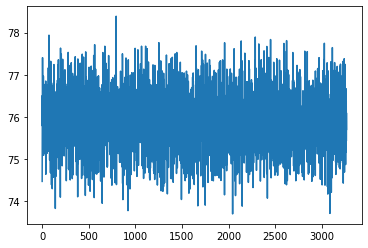

In [46]:
plt.plot(d['custom']['z_original_norm'])

In [34]:
# draw_experiment(path, 'z_cost_proximity')
draw_experiment(path, 'z_difference')

ValueError: Shape of passed values is (1575, 1), indices imply (1575, 2)

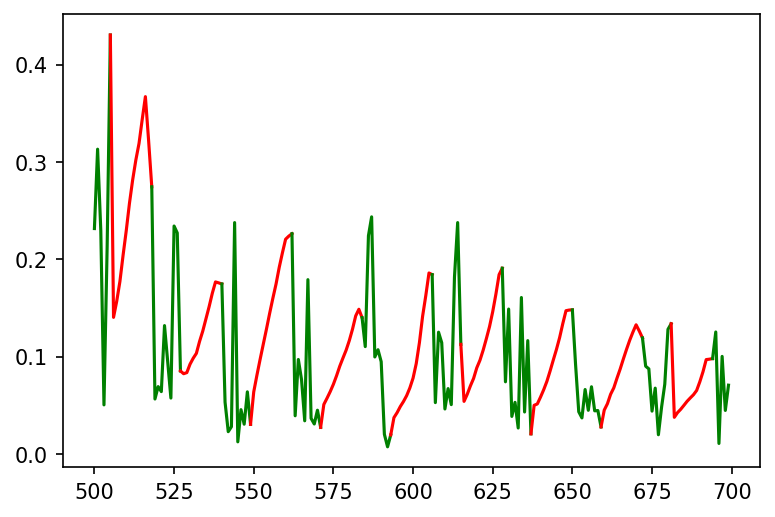

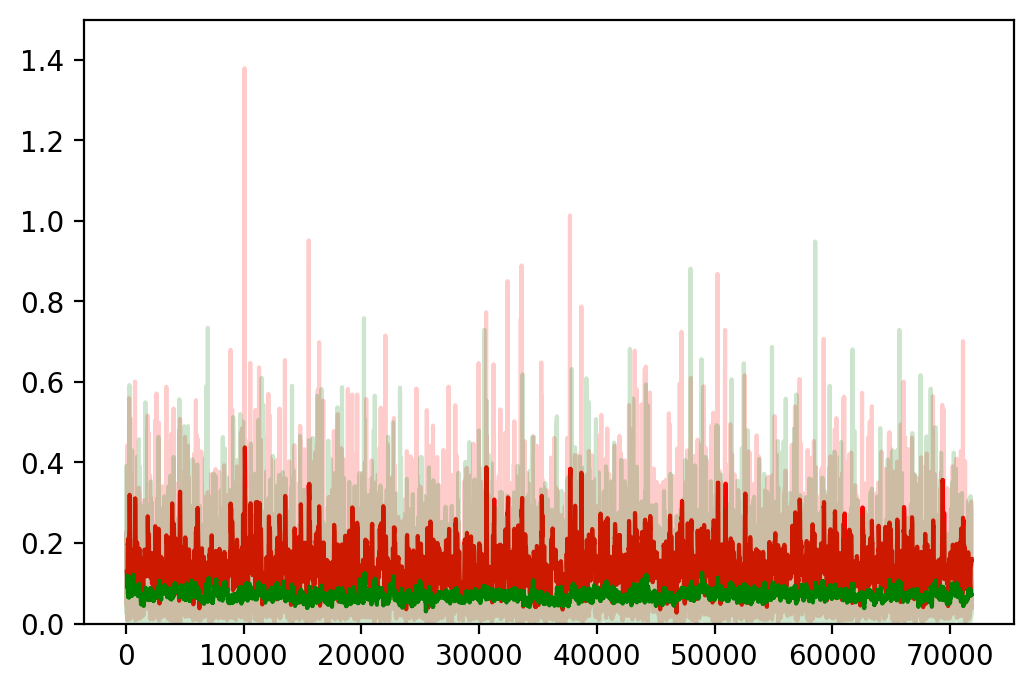

In [28]:
path2 = '/misc/vlgscratch4/LecunGroup/nvidia-collab/vlad/results/policy/dreaming_3_iter/seed=2/logs.json'
draw_experiment(path2, key='z_cost_proximity')

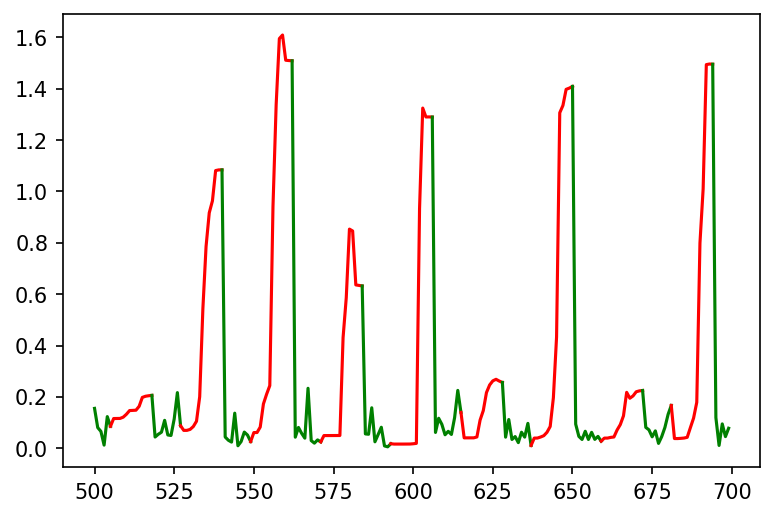

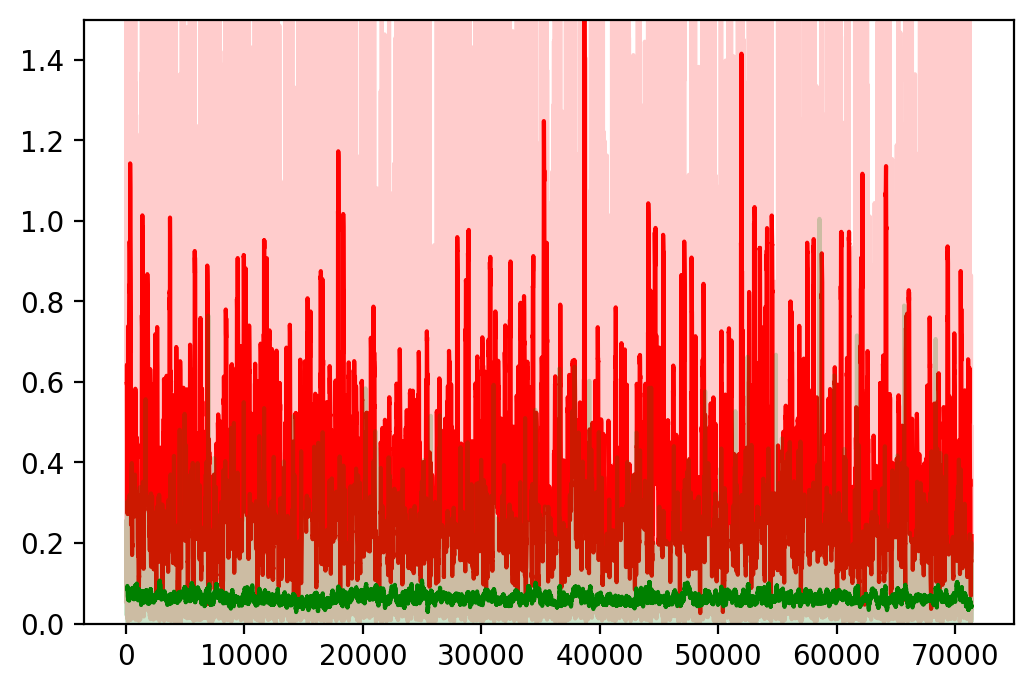

In [29]:
path3 = '/misc/vlgscratch4/LecunGroup/nvidia-collab/vlad/results/policy/dreaming_lbfgs_3_iter/seed=1/logs.json'
draw_experiment(path3, key='z_cost_proximity')